## Итоговая работа

In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import TruncatedSVD
from sympy import *
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
# рассчитаем между всеми пользователями косинусное расстояние
# (полученные нули в каждом списке - сравнение пользователя с самим собой)
dist = pairwise_distances(raitings, metric='cosine')
dist

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [4]:
# преобразуем списки в кортежи (упростим получение индекса пользователя)
list_1 = []
for ind, value in enumerate(dist):
    
    # найдем минимальное значение отличное от нуля
    value_min = min(value, key=lambda x:(x==0, x))
    
    # преобразуем элемент кортежа в список и получим индекс минимального значения,
    # выведем пары индексов в виде (пользователь, похожий пользователь)
    list_1.append((ind, value.tolist().index(value_min)))

list_1

[(0, 8),
 (1, 4),
 (2, 9),
 (3, 9),
 (4, 8),
 (5, 9),
 (6, 3),
 (7, 5),
 (8, 0),
 (9, 2)]

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [5]:
# снизим размерность с помощью метода "усеченного сингулярного разложения"
svd = TruncatedSVD(n_components=5)

# создадим новую матрицу с заданным числом признаков
raitings_5 = svd.fit_transform(raitings)
raitings_5

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

In [6]:
# найдем суммарную величину отклонения, показывающую насколько близки к исходной матрице
# значения уменьшенной матрицы, т.е. насколько выбранные компоненты отражают
# всю совокупность исходных признаков
svd.explained_variance_ratio_.sum()

0.7635288023599804

Для улучшения результата можно применить другой метод или увеличить количество признаков (компонент).

А теперь проверим совпадут ли пары пользователей исходной и уменьшенной матриц.

In [7]:
# новые косинусные расстояния
dist_new = pairwise_distances(raitings_5, metric='cosine')
dist_new

array([[0.        , 0.14398448, 0.08143821, 0.17483192, 0.10075001,
        0.24595049, 0.21483691, 0.15938002, 0.02900442, 0.06533896],
       [0.14398448, 0.        , 0.15669653, 0.13658521, 0.0893274 ,
        0.16101203, 0.1560662 , 0.13134501, 0.16451584, 0.16630298],
       [0.08143821, 0.15669653, 0.        , 0.114265  , 0.20473728,
        0.16341248, 0.32168286, 0.17531194, 0.14113812, 0.0473076 ],
       [0.17483192, 0.13658521, 0.114265  , 0.        , 0.28891382,
        0.18901793, 0.12865365, 0.1058849 , 0.20988377, 0.1101091 ],
       [0.10075001, 0.0893274 , 0.20473728, 0.28891382, 0.        ,
        0.15411413, 0.19694787, 0.12599977, 0.06084093, 0.13866705],
       [0.24595049, 0.16101203, 0.16341248, 0.18901793, 0.15411413,
        0.        , 0.23328248, 0.05946015, 0.18559378, 0.09355293],
       [0.21483691, 0.1560662 , 0.32168286, 0.12865365, 0.19694787,
        0.23328248, 0.        , 0.06946078, 0.16040556, 0.19684431],
       [0.15938002, 0.13134501, 0.1753119

In [8]:
# пары пользователей по новой матрице
list_2 = []
for ind_new, value_new in enumerate(dist_new):
    value_min_new = min(value_new, key=lambda x:(x==0, x))
    list_2.append((ind_new, value_new.tolist().index(value_min_new)))

list_2

[(0, 8),
 (1, 4),
 (2, 9),
 (3, 7),
 (4, 8),
 (5, 7),
 (6, 7),
 (7, 5),
 (8, 0),
 (9, 2)]

In [9]:
# соединим попарно два списка и выведем результат
list_zip = zip(list_1, list_2)

[print(i, j) for i, j in list_zip]
print()

(0, 8) (0, 8)
(1, 4) (1, 4)
(2, 9) (2, 9)
(3, 9) (3, 7)
(4, 8) (4, 8)
(5, 9) (5, 7)
(6, 3) (6, 7)
(7, 5) (7, 5)
(8, 0) (8, 0)
(9, 2) (9, 2)



Значение суммарного отклонения (0.7635) подтвердилось: только 7 из 10 пар пользователей совпали с исходной матрицей полных признаков.

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

Найдем производную функции:

$(tg^2(sin(x) + cos(2x+3))' = 2 \cdot tg(sin(x) + cos(2x+3)) \cdot (tg(sin(x) + cos(2x+3))'$

Согласно правилу дифференцирования $(tg(x))' = \frac{1}{cos^2(x)} = tg^2(x) + 1$, поэтому:

$(tg(sin(x) + cos(2x+3))' = (tg^2(sin(x) + cos(2x+3)) + 1) \cdot (sin(x) + cos(2x+3))'$

В свою очередь $(sin(x) + cos(2x+3))' = cos(x) - sin(2x+3) \cdot (2x+3)' = cos(x) - 2sin(2x+3)$

Соберем все части:

$(tg^2(sin(x) + cos(2x+3))' = 2 \cdot tg(sin(x) + cos(2x+3)) \cdot (tg^2(sin(x) + cos(2x+3)) + 1) \cdot (cos(x) - 2sin(2x+3))$

Вычислим ее значение в точке $x_0=1$:

$2 \cdot tg(sin(1) + cos(5)) \cdot (tg^2(sin(1) + cos(5)) + 1) \cdot (cos(1) - 2sin(5)) =$

$= 2 \cdot tg(0.8414709848 + 0.28366218546) \cdot (tg^2(0.8414709848 + 0.28366218546) + 1) \cdot (0.54030230586 - 2 \cdot (-0.95892427466)) =$

$= 2 \cdot tg(1.12513317026) \cdot (tg^2(1.12513317026) + 1) \cdot 2.45815085518 =$

$= 2 \cdot 2.0932877795 \cdot (4.38185372781 + 1) \cdot 2.45815085518 =$

$= 2 \cdot 2.0932877795 \cdot 5.38185372781 \cdot 2.45815085518 = 55.3859176289$

Проверим вычисления на python:

In [10]:
# зададим символьную переменную
x = symbols('x')

In [11]:
# запишем исходную функцию
fun = tan(sin(x) + cos(2*x + 3))**2

In [12]:
# найдем производную
fd = diff(fun, x)
fd

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [13]:
# вычислим значение производной в точке Х = 1 (функция evalf с подстановкой 1 вместо Х)
print(fd.evalf(subs={x: 1}))

55.3859176353379


### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [14]:
# задана функция
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [15]:
# значения Х
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [16]:
# значения заданной функции в точках Х
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

Искомые оптимальные параметры **a** и **b** - это значения **params$[0]$** и **params$[1]$** соответственно в функции абсолютной ошибки error, которую надо минимизировать.

Используем метод дифференциальной эволюции, чтобы получить эти значения.

In [17]:
# функция для минимизации
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [18]:
# зададим границы двух искомых переменных (они влияют, в т.ч., и на количество итераций)
bounds = [(-7,7), (-7,7)]

In [19]:
# найдем искомые параметры (значения Х из решения оптимизации)
values = differential_evolution(error, bounds=bounds)
values

     fun: 1.5101907440140394e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

Таким образом, **a = 3** и **b = -2.5**.

Построим совместные графики двух функций для проверки результата.

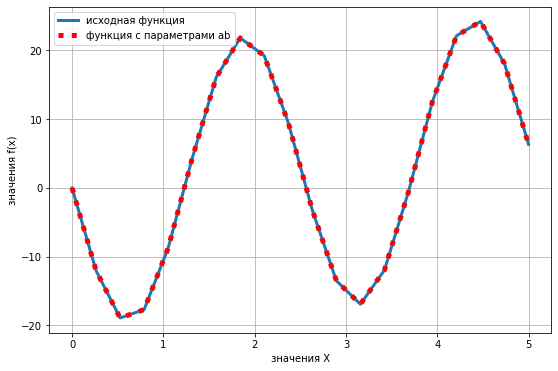

In [20]:
# зададим полученные значения
a = values['x'][0]
b = values['x'][1]

plt.figure(figsize=(9,6))
plt.plot(x, fx, lw=3, label='исходная функция')
plt.plot(x, f(x, a, b), 'r:', lw=5, label='функция с параметрами ab')

plt.legend(loc='upper left')
plt.xlabel('значения Х')
plt.ylabel('значения f(x)')
plt.grid()

График подтверждает, что найденные **a** и **b** оптимальны: разница между значениями функций визуально не видна.

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [21]:
# создадим 1000 выборок, каждая из которых состоит из 50 элементов
# выбор значений - из дискретной случайной величины с 20-ю значениями
rand = np.random.randint(1, 21, size=(1000, 50))

In [22]:
# рассчитаем среднее значение каждой выборки
rand_mean = [np.mean(i) for i in rand]

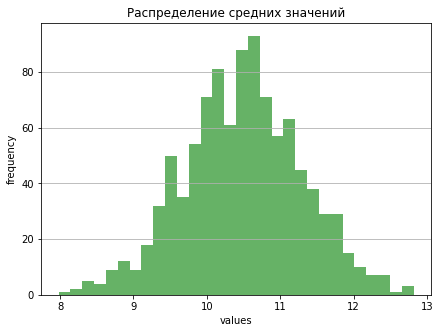

In [23]:
# построим гистограмму распределения средних
plt.figure(figsize=(7,5))
plt.hist(rand_mean, bins=30, color='green', alpha=0.6)

plt.title('Распределение средних значений')
plt.xlabel('values')
plt.ylabel('frequency')

plt.grid(axis='y')

Распределение средних значений 1000 выборок похоже на нормальное распределение.

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [24]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


Преобразуем исходную матрицу (добавим $-\lambda$ к элементам главной диагонали):

$\left(
\begin{array}{rcl}
1 & 4 \\
1 & 1
\end{array}
\right) \rightarrow
\left|
\begin{array}{rcl}
1-\lambda & 4 \\
1 & 1-\lambda
\end{array}
\right| = 0$

Найдем определитель:

$(1 - \lambda) \cdot (1 - \lambda) - 1 \cdot 4 = 0$

$1 - \lambda - \lambda + \lambda^2 - 4 = 0$

$\lambda^2 - 2\lambda - 3 =0$

Решим квадратное уравнение (найденные корни и будут собственными значениями матрицы):

формула дискриминанта $D = b^2 - 4ac$

$D = (-2)^2 - 4 \cdot 1 \cdot (-3) = 4 +12 = 16$

$D > 0$, значит, у уравнения - два корня, определим их по формуле:

$\lambda_1 = \frac{-b + \sqrt{D}}{2a} = \frac{-(-2) + \sqrt{16}}{2 \cdot 1} = \frac{6}{2} = 3$

$\lambda_2 = \frac{-b - \sqrt{D}}{2a} = \frac{-(-2) - \sqrt{16}}{2 \cdot 1} = \frac{-2}{2} = -1$

Составим для каждого значения $\lambda$ систему линейных уравнений (найдем собственные вектора):

$\lambda_1 = 3$

$\left\{
\begin{array}{rcl}
-2x + 4y = 0 \\
x - 2y = 0
\end{array}
\right.$

Из второго уравнения очевидно, что $x = 2y$, подставим значение в первое уравнение:

$-2 \cdot 2y + 4y = 0$

$-4y + 4y = 0$, т.е. $y = 1$, а $x = 2$.

Таким образом, найден вектор

$\left(
\begin{array}{c}
x \\
y
\end{array}
\right) \rightarrow
\left(
\begin{array}{c}
2 \\
1
\end{array}
\right)$

Аналогично - для второго значения $\lambda$:

$\lambda_2 = -1$

$\left\{
\begin{array}{rcl}
2x + 4y = 0 \\
x + 2y = 0
\end{array}
\right.$

$x = -2y$ (из второго уравнения), тогда:

$2 \cdot (-2y) + 4y = 0$

$-4y + 4y = 0$, т.е. $y = 1$, а $x = -2$.

Для $\lambda_2 = -1$ собственный вектор

$\left(
\begin{array}{c}
x \\
y
\end{array}
\right) \rightarrow
\left(
\begin{array}{c}
-2 \\
1
\end{array}
\right)$

Сделаем вычисления на python:

In [25]:
val,vec = np.linalg.eig(m)

for i in range(len(val)):
    print('Собственному значению ', val[i])
    print('соответствует собственный вектор', vec[:,i])
    print()

Собственному значению  3.0000000000000004
соответствует собственный вектор [0.89442719 0.4472136 ]

Собственному значению  -0.9999999999999996
соответствует собственный вектор [-0.89442719  0.4472136 ]



Полученные значения векторов отличаются от рассчитанных вручную в 2 раза. Однако оба варианта являются верными, исходя из условия, что если вектор умножить на число, он тоже подходит в качестве решения.